#Hw1
b06705034 資管三 吳禹辰
##Import需要的package及資料集

In [195]:
#Importing packages
import pandas as pd
import numpy as np
import math
import operator
import pickle
from sklearn import preprocessing

#Importing data

with open('msd_data1.pickle', 'rb') as f:
    data = pickle.load(f)
    
dataX = np.array(data['X_train'])
dataY = np.array(data['Y_train'])
test = np.array(data['X_test'])

print(type(dataX))
print(type(dataY))
print(type(test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


##標準化資料

In [198]:
##Standardize
from sklearn import preprocessing

zscore = preprocessing.StandardScaler()
data_zs = zscore.fit_transform(np.vstack((dataX, test)))

test_zs = data_zs[5000:8000]

data_zs = data_zs[0:5000]

print(type(data_zs))
print(type(test_zs))
print(data_zs.shape)
print(test_zs.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(5000, 90)
(3000, 90)


#Q1.1 Creating myknn_regressor

定義myknn_regressor及相關function，包含equal_weight及remove_outlier模式

In [200]:
#Define
def getDist(data1, data2):
    
    distance = np.square(data1 - data2)
    
    return np.sqrt(sum(distance))


class myknn_regressor():
    
    def __init__(self, k, mode):
        self.k = k
        self.mode = mode
    
    def fit(self, x, y):
        self.x = x
        self.y = y
        
    def predict(self, test):
        if self.mode == "equal_weight":
            return my_knn(self.x, self.y, test, k, 0)
        else:
            return my_knn(self.x, self.y, test, k, 1)
    

def my_knn(trainingSet, trainingY, testInstance, k, mode):

    sort = {}

    length = testInstance.shape[0]
    
    distances = []

    for x in range(len(trainingSet)):

        dist = getDist(testInstance, trainingSet[x])
        
        distances.append([x, dist])

    sorted_d = sorted(distances, key=operator.itemgetter(1), reverse = True)
    
    neighbors = np.array(sorted_d[0:k])

    response = 0
    
    if mode == 0:
        response = sum(dataY[neighbors[:,0].astype(int)])
        result = response / len(neighbors)
    else:
        ys = dataY[neighbors[:,0].astype(int)]
        Q1 = np.quantile(ys, 0.25)
        Q3 = np.quantile(ys, 0.75)
        IQR = Q3-Q1
        
        ys = ys[~((ys < (Q1 - 1.5 * IQR)) | (ys > (Q3 + 1.5 * IQR)))]
        result = sum(ys) / len(ys)
        
    return(result)


k = 20

myknn = myknn_regressor(k, "equal_weight")
myknn.fit(data_zs, dataY)

ypred = myknn.predict(test_zs[2])

print(ypred)

2002.2


使用k=20及第2筆資料測試，得到結果年份為2002.2

#Q1.2 
Load data from msd_data1.pickle. You should standardized all feature values so that all features have a zero mean and a unit variance before training a KNN model. Make predictions using  𝑘=20  and "equal_weight"  𝑓 . List the RMSE and the first 20 predictions in the testing data.

使用msd_data1中的feature，並以equal_weight模式放入myknn_regressor進行預測

In [201]:
k = 20
n = test.shape[0]

myknn = myknn_regressor(k, "equal_weight")
myknn.fit(data_zs, dataY)
predictions = []
tot_sum = 0

for i in range(n):
    pred = myknn.predict(test_zs[i])
    if i < 20:
        predictions.append(pred)
    tot_sum += (pred - data['Y_test'][i]) ** 2

rmse = math.sqrt(tot_sum / n)
print(rmse)
print(predictions)

11.335477125673469
[2002.0, 2001.85, 2002.2, 2001.5, 2001.45, 2001.85, 2000.95, 2002.05, 2000.55, 2001.85, 2001.85, 2000.55, 2001.55, 2001.85, 2000.75, 2001.85, 2001.6, 2001.85, 2001.75, 2001.85]


在equal_weight模式下，最後算出的RMSE為11.335477125673469
預測出前20筆test資料的年份分別為2002.0, 2001.85, 2002.2, 2001.5, 2001.45, 2001.85, 2000.95, 2002.05, 2000.55, 2001.85, 2001.85, 2000.55, 2001.55, 2001.85, 2000.75, 2001.85, 2001.6, 2001.85, 2001.75, 2001.85

#Q1.3
Load data from msd_data1.pickle. Standardized all feature values so that all features have a zero mean and unit variance. Make predictions using  𝑘=20  and "remove_outier"  𝑓 . List the RMSE and the first 20 predictions in the testing data.
使用msd_data1中的feature，並以remove_outliers模式放入myknn_regressor進行預測

In [202]:
k = 20
n = test.shape[0]

myknn = myknn_regressor(k, "remove_outliers")
myknn.fit(data_zs, dataY)
predictions = []
tot_sum = 0

for i in range(n):
    pred = myknn.predict(test_zs[i])
    if i < 20:
        predictions.append(pred)
    tot_sum += (pred - data['Y_test'][i]) ** 2

rmse = math.sqrt(tot_sum / n)
print(rmse)
print(predictions)

11.424484148125318
[2002.0, 2001.85, 2002.2, 2001.5, 2001.45, 2001.85, 2002.0, 2002.05, 2001.578947368421, 2001.85, 2001.85, 2001.578947368421, 2001.55, 2001.85, 2001.7894736842106, 2001.85, 2001.6, 2001.85, 2001.75, 2001.85]


在remove_outliers模式下，最後算出的RMSE為11.424484148125318
預測出前20筆test資料的年份分別為2002.0, 2001.85, 2002.2, 2001.5, 2001.45, 2001.85, 2002.0, 2002.05, 2001.578947368421, 2001.85, 2001.85, 2001.578947368421, 2001.55, 2001.85, 2001.7894736842106, 2001.85, 2001.6, 2001.85, 2001.75, 2001.85

#Q2
##First case
使用sklearn的KNeighborsRegressor及標準化資料進行預測並算出不同K值下的RMSE

In [203]:
from sklearn.neighbors import KNeighborsRegressor

n = test.shape[0]
rmses1 = []
ks =[1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]

for ki in ks:
    knn1 = KNeighborsRegressor(ki)
    knn1.fit(data_zs,dataY)
    ypred1 = knn1.predict(test_zs)
    
    tot_sum = 0

    for i in range(n):
        tot_sum += (ypred1[i] - data['Y_test'][i]) ** 2

    rmse = math.sqrt(tot_sum / n)
    rmses1.append(rmse)
rmses1

[13.96895367114755,
 12.092787106370475,
 11.376243928728188,
 11.038971683691074,
 10.870996274491139,
 10.417184360469005,
 10.322535792390612,
 10.259587873464188,
 10.237273230699653,
 10.225737282121178,
 10.194419815475012,
 10.194883857847513,
 10.199987105615993,
 10.205220174008993,
 10.208596366769253,
 10.219969862063271,
 10.227230909847176,
 10.247051366124797,
 10.259975237543223,
 10.281837520069818,
 10.309192252977647,
 10.32765350422313,
 10.349121530352232]

##Second case
使用sklearn的KNeighborsRegressor及未標準化資料進行預測並算出不同K值下的RMSE

In [164]:
rmses2=[]

for ki in ks:
    knn2 = KNeighborsRegressor(ki)
    knn2.fit(dataX,dataY)
    ypred2 = knn2.predict(test)
    
    tot_sum = 0

    for i in range(n):
        tot_sum += (ypred2[i] - data['Y_test'][i]) ** 2

    rmse = math.sqrt(tot_sum / n)
    rmses2.append(rmse)
rmses2

[14.923638966418345,
 12.777499755429464,
 12.075674967716077,
 11.767805657810635,
 11.466392632384453,
 11.077460900404935,
 10.88897913794797,
 10.797788546734951,
 10.790073017979692,
 10.750265612567011,
 10.717738719772298,
 10.714437504678774,
 10.698494013475859,
 10.69110105960404,
 10.68260873412441,
 10.672535729098705,
 10.662907517124506,
 10.677019504524656,
 10.68313963899639,
 10.687017556442067,
 10.691630026202139,
 10.69071978380711,
 10.69885337470018]

##Third case
使用myknn_regressor及標準化資料進行預測並算出不同K值下的RMSE

In [205]:
rmses3 = []

ks = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]

for ki in ks:
    k = ki
    
    myknn = myknn_regressor(k, "remove_outliers")
    myknn.fit(data_zs, dataY)
    tot_sum = 0

    for i in range(n):
        pred = myknn.predict(test_zs[i])
        tot_sum += (pred - data['Y_test'][i]) ** 2
    rmse = math.sqrt(tot_sum / n)
    print(rmse)
    rmses3.append(rmse)
    
rmses3

15.943420795634376
11.020189804778017
11.017766796641885
10.967105171071049
11.347771726120865
11.034029380505377
11.271589798844069
11.424484148125318
11.49022794220668
11.585995770587969
11.670226227556821
11.772731181287634
11.80341410593011
11.831738804839167
11.74895379838849
11.722749214147337
11.702702826535534
11.79842419494189
11.874546581021214
11.869112062800736
11.819246968853193
11.779796926553244
11.754590386763553


[15.943420795634376,
 11.020189804778017,
 11.017766796641885,
 10.967105171071049,
 11.347771726120865,
 11.034029380505377,
 11.271589798844069,
 11.424484148125318,
 11.49022794220668,
 11.585995770587969,
 11.670226227556821,
 11.772731181287634,
 11.80341410593011,
 11.831738804839167,
 11.74895379838849,
 11.722749214147337,
 11.702702826535534,
 11.79842419494189,
 11.874546581021214,
 11.869112062800736,
 11.819246968853193,
 11.779796926553244,
 11.754590386763553]

畫圖，並分別以紅、藍、綠線表示三個case

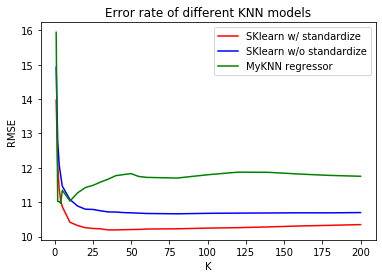

In [206]:
import matplotlib.pyplot as plt

x = ks
y1 = rmses1
y2 = rmses2
y3 = rmses3

plt.figure()
plt.plot(x,y1,label="SKlearn w/ standardize",color="red")
plt.plot(x,y2,"b",label="SKlearn w/o standardize")
plt.plot(x,y3,label="MyKNN regressor", color = "green")
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("Error rate of different KNN models")
plt.legend()
plt.show()

有標準化的資料搭配SKlearn的KNeighbors_regressor表現好於未標準化的KNeighbors_regressor好於myknn_regressor